In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns 
import warnings
from sklearn.metrics import mean_squared_error ,mean_absolute_error 

In [5]:
Data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )

In [7]:
print('Shape before removing duplicates', Data.shape)
df = Data.drop_duplicates()
print('Shape after removing duplicates', df.shape)

Shape before removing duplicates (3051, 34)
Shape after removing duplicates (2285, 34)


In [9]:
df = df.drop(['binnedInc', 'Geography', 'PctSomeCol18_24'], axis = 1)
df.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,48.4,49.6,46.4,...,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,41.9,41.3,43.2,...,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,48.9,47.9,49.9,...,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,44.2,42.7,45.2,...,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,45.0,42.2,48.0,...,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


In [10]:
df.isna().sum()

avgAnnCount                  0
avgDeathsPerYear             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over         119
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    461
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRate                    0
TARGET_deathRate             0
dtype: int64

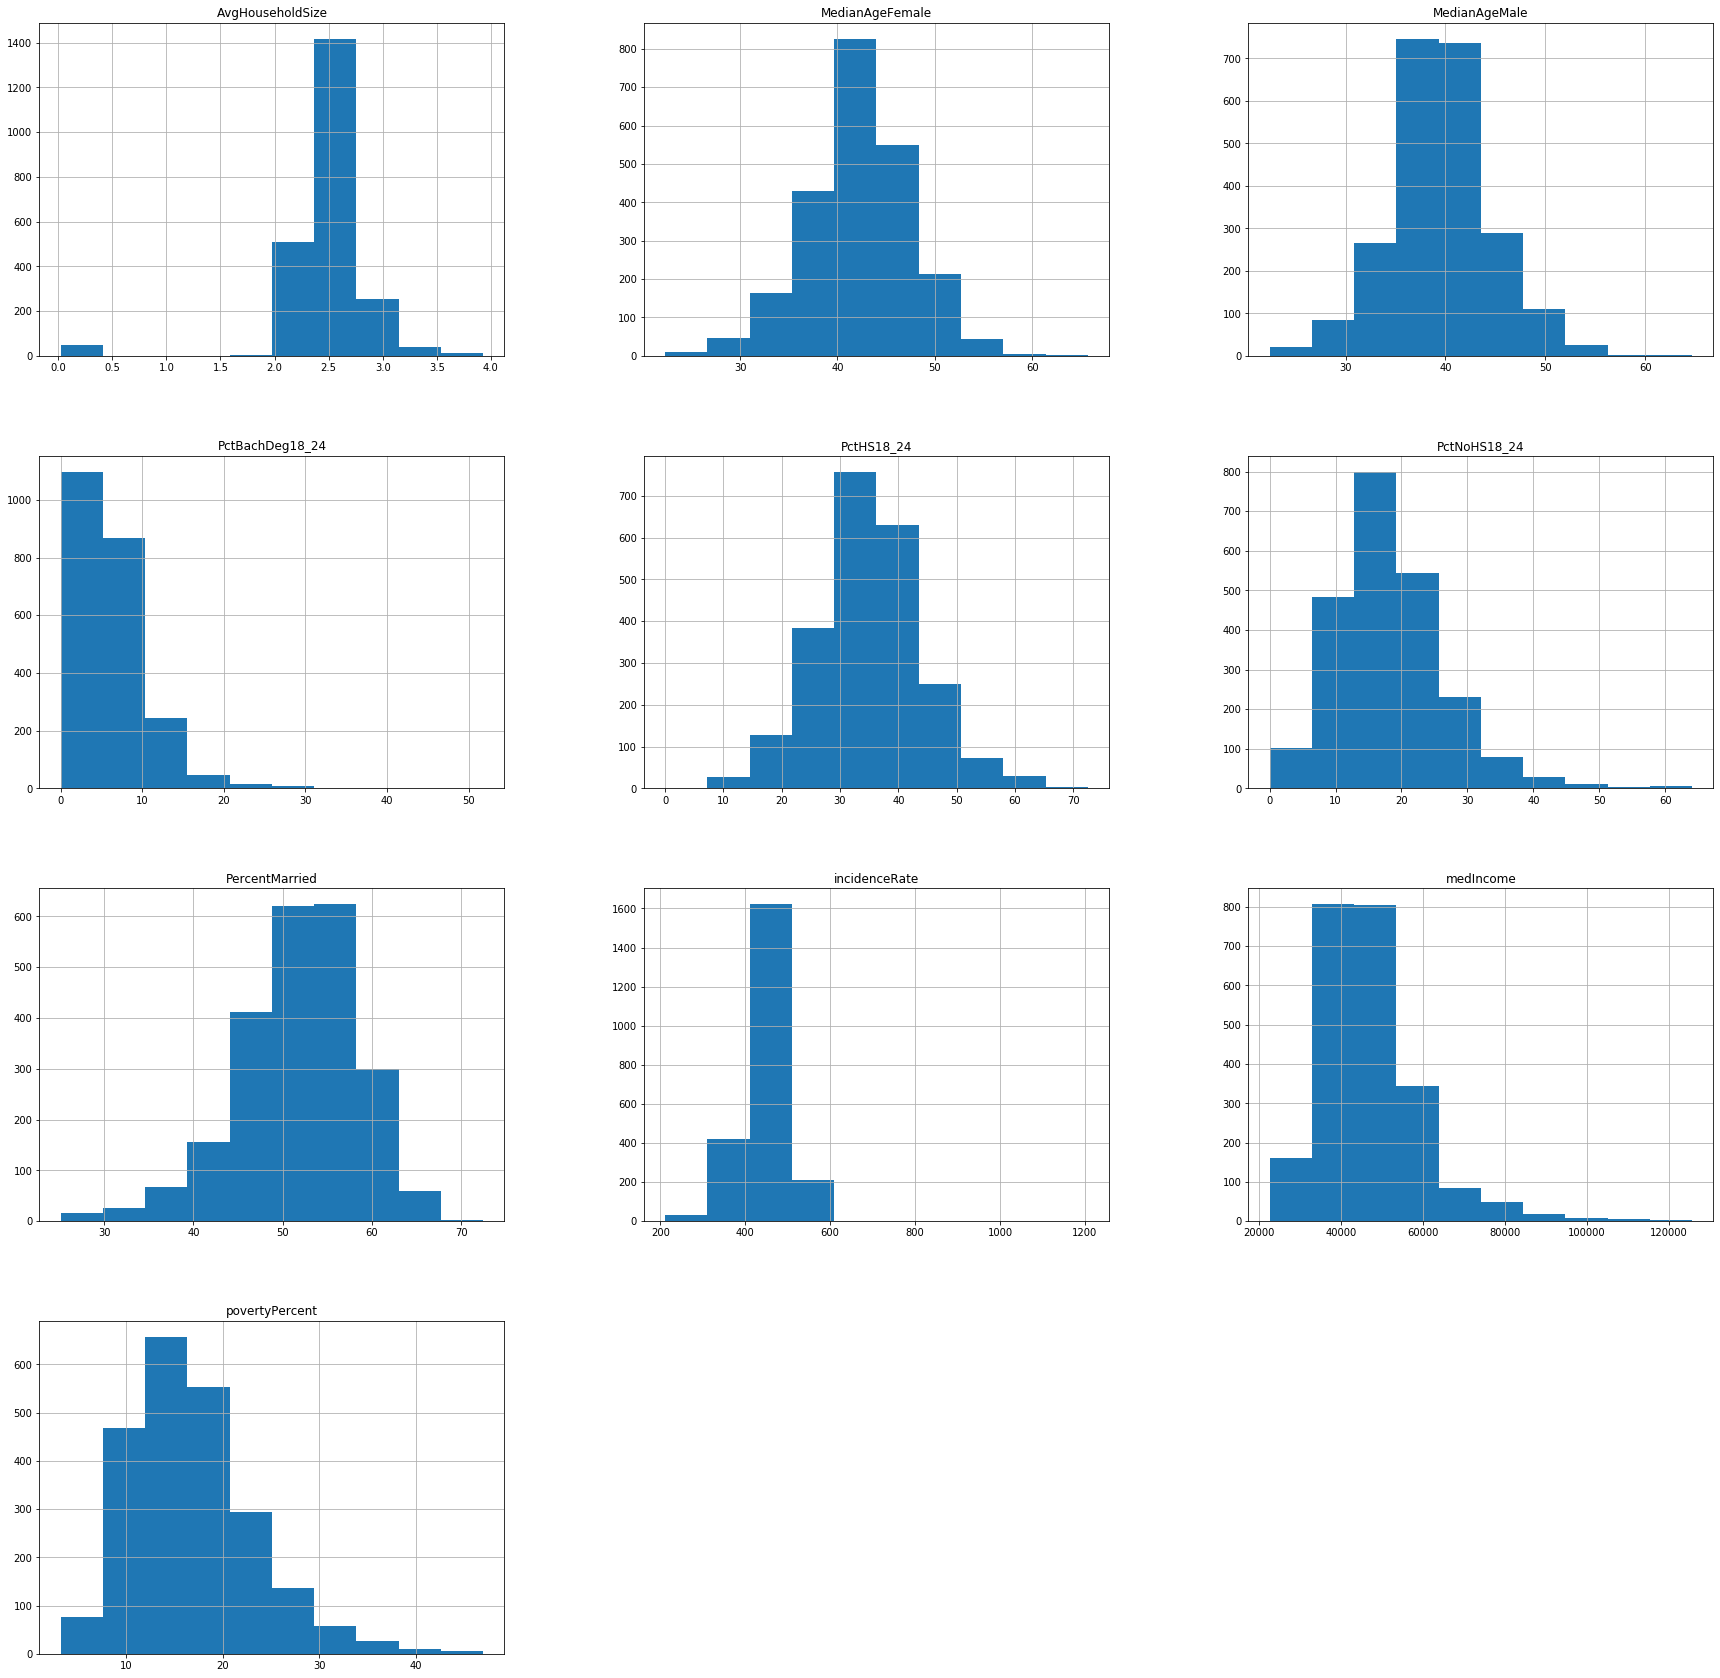

In [11]:

histo=df.hist(['incidenceRate', 'medIncome',
       'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24'], figsize=(30,30))

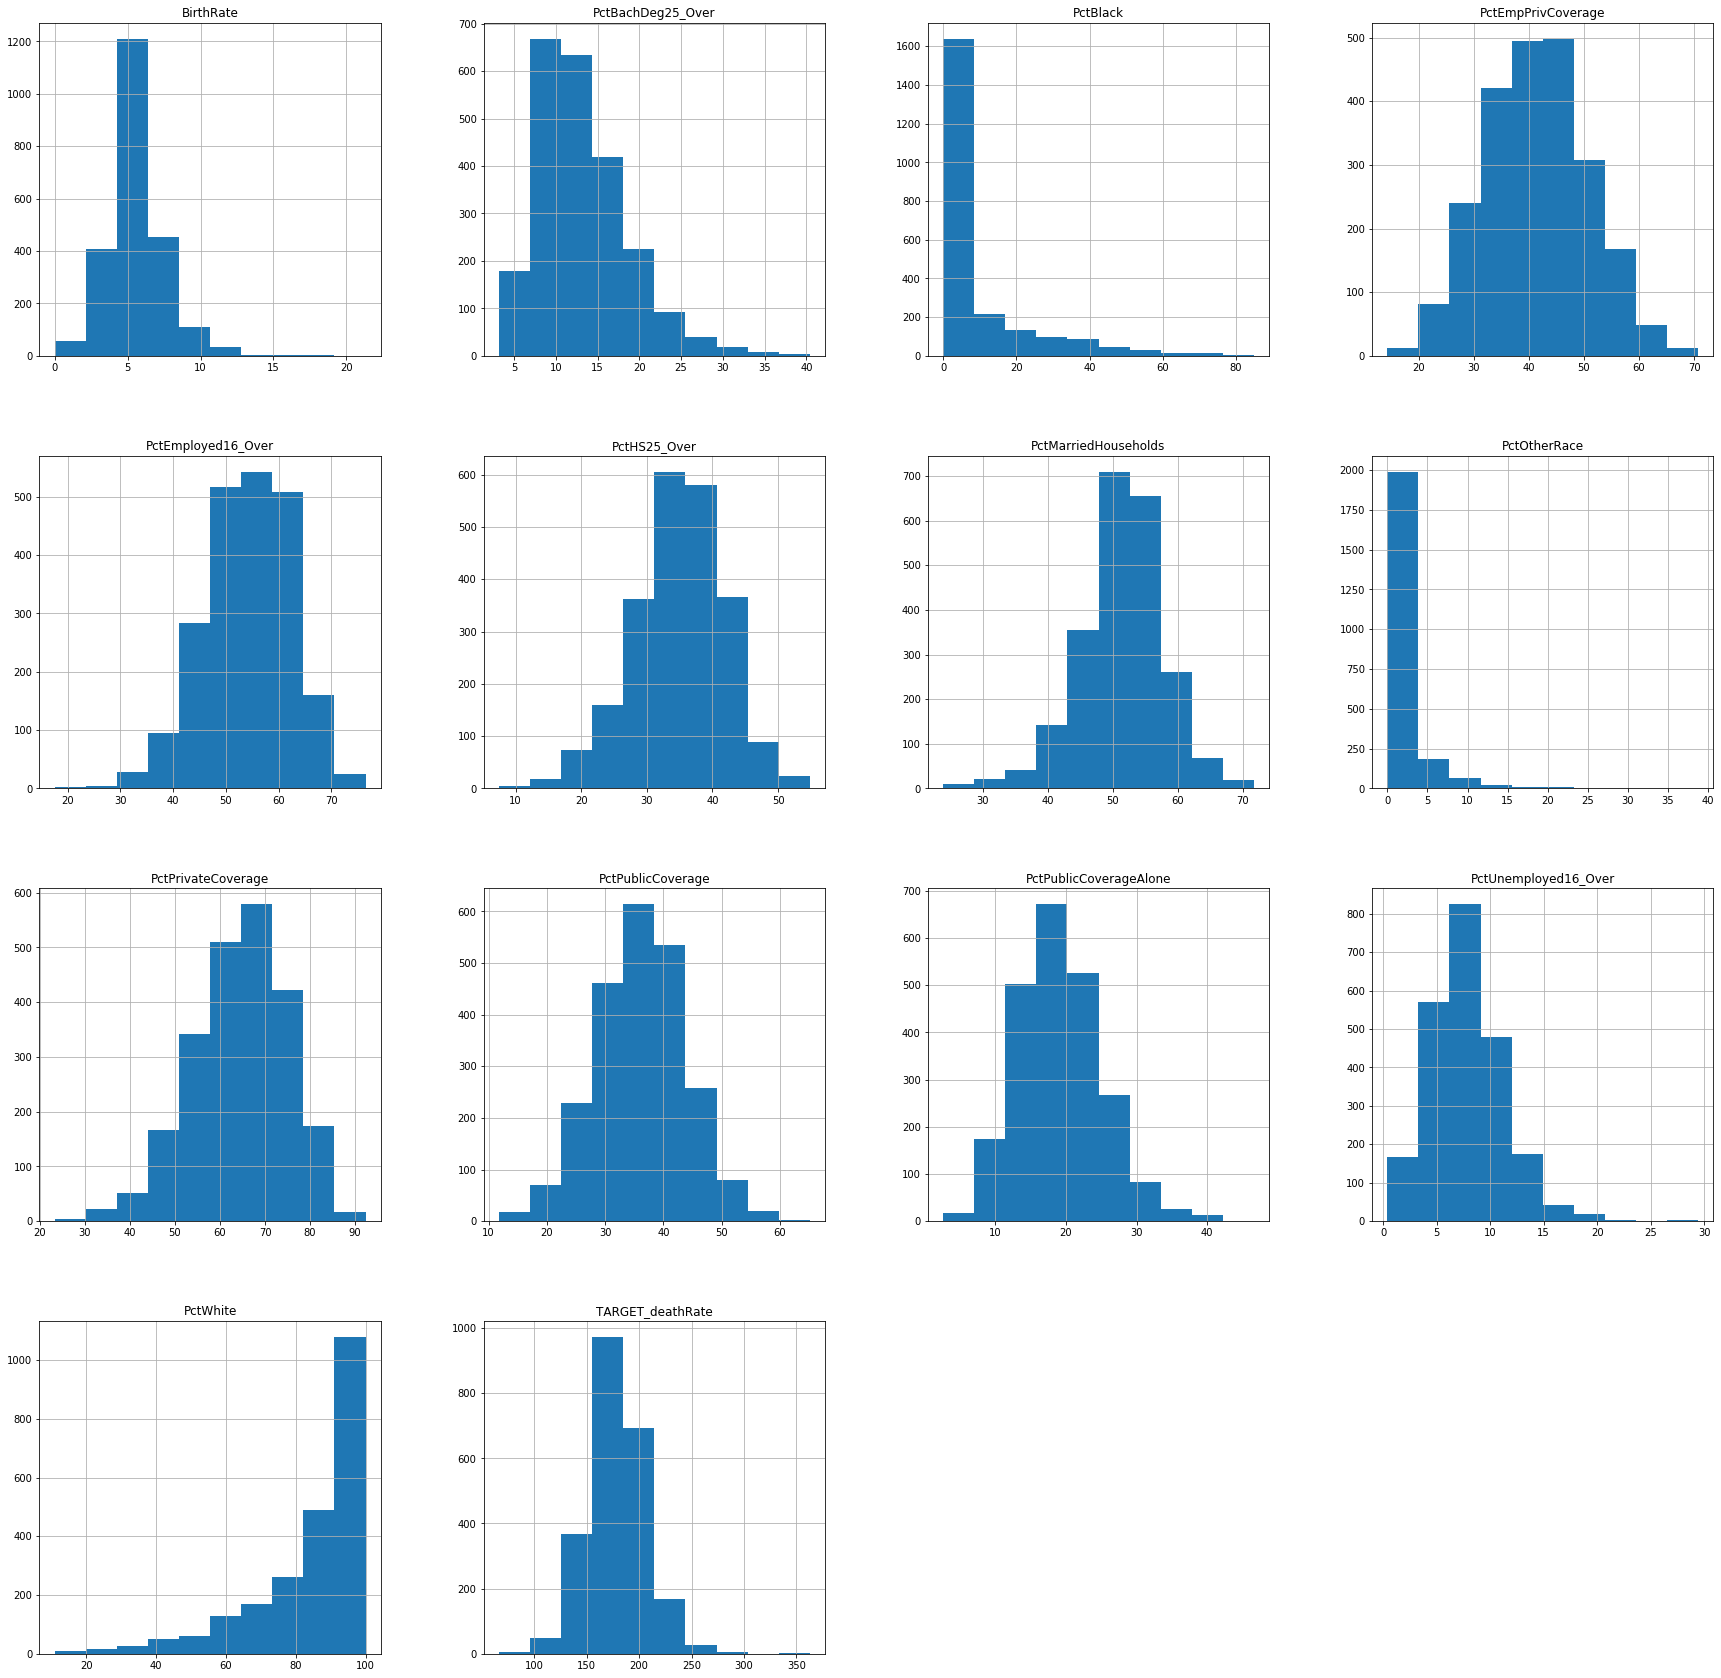

In [12]:
histo = df.hist(['PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'TARGET_deathRate'], figsize=(30,30))

In [167]:
df['PctEmployed16_Over'] = df['PctEmployed16_Over'].fillna(df['PctEmployed16_Over'].median())

In [168]:
df['PctPrivateCoverageAlone'] = df['PctPrivateCoverageAlone'].fillna(df['PctPrivateCoverageAlone'].median())

Predictors = ['PctBachDeg25_Over', 'incidenceRate',
       'PctPublicCoverageAlone', 'povertyPercent', 'medIncome',
       'PctEmployed16_Over', 'PctHS25_Over', 'PctPublicCoverage',
       'PctPrivateCoverage', 'PctUnemployed16_Over', 'PctMarriedHouseholds',
       'PctBachDeg18_24', 'PctEmpPrivCoverage', 'PercentMarried', 'PctHS18_24','PctOtherRace' ,'popEst2015','avgDeathsPerYear',
       'PctBlack']

In [191]:
Predictors = ['PctBachDeg25_Over', 'incidenceRate',
       'PctPublicCoverageAlone', 'povertyPercent', 'medIncome',
       'PctEmployed16_Over', 'PctHS25_Over', 'PctPublicCoverage',
       'PctPrivateCoverage', 'PctUnemployed16_Over', 'PctMarriedHouseholds',
       'PctBachDeg18_24', 'PctEmpPrivCoverage', 'PercentMarried', 'PctHS18_24','PctOtherRace' ,'popEst2015','avgDeathsPerYear',
       'PctBlack']

In [192]:
Target = ['TARGET_deathRate']
X = df[Predictors].values
y = df[Target].values

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [194]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1828, 18)
(1828, 1)
(457, 18)
(457, 1)


In [195]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lrRegModel = lr.fit(X_train, y_train)
lrPrediction = lrRegModel.predict(X_test)
from sklearn.metrics import r2_score
print('R2 value', r2_score(y_train, lrRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-lrPrediction)/y_test))*100))

TestingData = pd.DataFrame(X_test, columns=Predictors)
TestingData['Target'] = y_test
TestingData['PredictedValue'] = lrPrediction
TestingData['APE'] = (np.abs(y_test-lrPrediction)/y_test)*100
TestingData.head()

R2 value 0.5124794169425495
Accuracy 91.76120862564211


,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,povertyPercent,medIncome,PctEmployed16_Over,PctHS25_Over,PctPublicCoverage,PctPrivateCoverage,PctUnemployed16_Over,...,PctBachDeg18_24,PctEmpPrivCoverage,PctHS18_24,PctOtherRace,popEst2015,avgDeathsPerYear,PctBlack,Target,PredictedValue,APE
0,15.9,471.4,15.6,14.7,56573.0,54.10,35.8,32.9,71.8,8.5,...,5.7,45.8,36.9,1.076931,39165.0,85.0,27.649817,174.7,176.536196,1.051057
1,17.5,411.3,13.1,10.8,55354.0,64.50,28.5,30.5,71.4,3.8,...,5.3,44.4,29.1,1.286873,29228.0,61.0,0.814214,152.0,153.745819,1.148565
2,22.9,410.9,12.5,9.2,64533.0,56.90,25.5,28.0,70.6,4.9,...,8.5,43.7,41.3,3.178079,129048.0,221.0,1.968537,158.3,147.939799,6.544663
3,17.4,492.9,10.8,6.7,61215.0,54.45,35.3,30.3,82.9,3.9,...,14.7,54.9,24.5,0.104780,12435.0,29.0,0.411058,151.8,169.645083,11.755654
4,20.4,497.7,15.7,11.2,55482.0,63.10,31.6,33.1,72.2,5.9,...,11.6,50.2,36.1,0.173776,201169.0,451.0,0.684088,173.7,177.362342,2.108429


R2 value 0.6398312510627515
Accuracy 84.6894864700902


,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,povertyPercent,medIncome,PctEmployed16_Over,PctHS25_Over,PctPublicCoverage,PctPrivateCoverage,PctUnemployed16_Over,PctMarriedHouseholds,PctBachDeg18_24,PctEmpPrivCoverage,PctHS18_24,PctOtherRace,popEst2015,avgDeathsPerYear,PctBlack,Target,PredictedValue
0,15.9,471.4,15.6,14.7,56573.0,54.10,35.8,32.9,71.8,8.5,58.143608,5.7,45.8,36.9,1.076931,39165.0,85.0,27.649817,174.7,178.361922
1,17.5,411.3,13.1,10.8,55354.0,64.50,28.5,30.5,71.4,3.8,54.584673,5.3,44.4,29.1,1.286873,29228.0,61.0,0.814214,152.0,152.833333
2,22.9,410.9,12.5,9.2,64533.0,56.90,25.5,28.0,70.6,4.9,61.434325,8.5,43.7,41.3,3.178079,129048.0,221.0,1.968537,158.3,152.833333
3,17.4,492.9,10.8,6.7,61215.0,54.45,35.3,30.3,82.9,3.9,58.691877,14.7,54.9,24.5,0.104780,12435.0,29.0,0.411058,151.8,178.361922
4,20.4,497.7,15.7,11.2,55482.0,63.10,31.6,33.1,72.2,5.9,51.223106,11.6,50.2,36.1,0.173776,201169.0,451.0,0.684088,173.7,171.020513


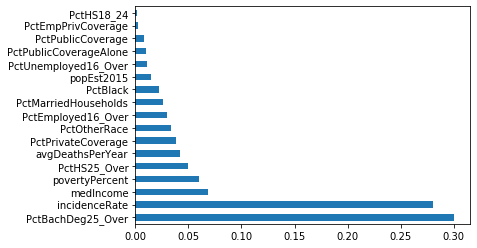

In [196]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=6, criterion='mse')
dtRegModel = dt.fit(X_train, y_train)
dtPrediction = dtRegModel.predict(X_test)
print('R2 value', r2_score(y_train, dtRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-dtPrediction)/y_test))*100))

feature_importances = pd.Series(dtRegModel.feature_importances_, index=Predictors)
feature_importances.nlargest(17).plot.barh()

TestingData = pd.DataFrame(X_test, columns=Predictors)
TestingData['Target'] = y_test
TestingData['PredictedValue'] = dtPrediction
#TestingData['APE'] = (np.abs(y_test-dtPrediction)/y_test)*100
TestingData.head()

C:\Users\Ajay\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


R2 value 0.235982688999391
mean_squared_error 563.3571539872457
Accuracy 87.14502463241159


,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,povertyPercent,medIncome,PctEmployed16_Over,PctHS25_Over,PctPublicCoverage,PctPrivateCoverage,PctUnemployed16_Over,PctMarriedHouseholds,PctBachDeg18_24,PctEmpPrivCoverage,PctHS18_24,PctOtherRace,popEst2015,avgDeathsPerYear,PctBlack,Target,PredictedValue
0,15.9,471.4,15.6,14.7,56573.0,54.10,35.8,32.9,71.8,8.5,58.143608,5.7,45.8,36.9,1.076931,39165.0,85.0,27.649817,174.7,168.251483
1,17.5,411.3,13.1,10.8,55354.0,64.50,28.5,30.5,71.4,3.8,54.584673,5.3,44.4,29.1,1.286873,29228.0,61.0,0.814214,152.0,167.522263
2,22.9,410.9,12.5,9.2,64533.0,56.90,25.5,28.0,70.6,4.9,61.434325,8.5,43.7,41.3,3.178079,129048.0,221.0,1.968537,158.3,167.522263
3,17.4,492.9,10.8,6.7,61215.0,54.45,35.3,30.3,82.9,3.9,58.691877,14.7,54.9,24.5,0.104780,12435.0,29.0,0.411058,151.8,168.251483
4,20.4,497.7,15.7,11.2,55482.0,63.10,31.6,33.1,72.2,5.9,51.223106,11.6,50.2,36.1,0.173776,201169.0,451.0,0.684088,173.7,168.251483


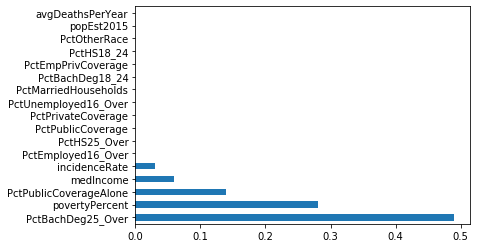

In [197]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=1, criterion='mse', n_estimators=100)
rfRegModel = rf.fit(X_train, y_train)
rfPrediction = rfRegModel.predict(X_test)
print('R2 value', r2_score(y_train, rfRegModel.predict(X_train)))
print('mean_squared_error', mean_squared_error(y_train, rfRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-rfPrediction)/y_test))*100))

feature_importances = pd.Series(rfRegModel.feature_importances_, index=Predictors)
feature_importances.nlargest(17).plot.barh()

TestingData = pd.DataFrame(X_test, columns=Predictors)
TestingData['Target'] = y_test
TestingData['PredictedValue'] = rfPrediction
#TestingData['APE'] = (np.abs(y_test-rfPrediction)/y_test)*100
TestingData.head()

C:\Users\Ajay\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 value 0.25446904280301486
Accuracy 86.38359363400805


,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,povertyPercent,medIncome,PctEmployed16_Over,PctHS25_Over,PctPublicCoverage,PctPrivateCoverage,PctUnemployed16_Over,PctMarriedHouseholds,PctBachDeg18_24,PctEmpPrivCoverage,PctHS18_24,PctOtherRace,popEst2015,avgDeathsPerYear,PctBlack,Target,PredictedValue
0,15.9,471.4,15.6,14.7,56573.0,54.10,35.8,32.9,71.8,8.5,58.143608,5.7,45.8,36.9,1.076931,39165.0,85.0,27.649817,174.7,190.771538
1,17.5,411.3,13.1,10.8,55354.0,64.50,28.5,30.5,71.4,3.8,54.584673,5.3,44.4,29.1,1.286873,29228.0,61.0,0.814214,152.0,166.172468
2,22.9,410.9,12.5,9.2,64533.0,56.90,25.5,28.0,70.6,4.9,61.434325,8.5,43.7,41.3,3.178079,129048.0,221.0,1.968537,158.3,166.172468
3,17.4,492.9,10.8,6.7,61215.0,54.45,35.3,30.3,82.9,3.9,58.691877,14.7,54.9,24.5,0.104780,12435.0,29.0,0.411058,151.8,190.771538
4,20.4,497.7,15.7,11.2,55482.0,63.10,31.6,33.1,72.2,5.9,51.223106,11.6,50.2,36.1,0.173776,201169.0,451.0,0.684088,173.7,190.771538


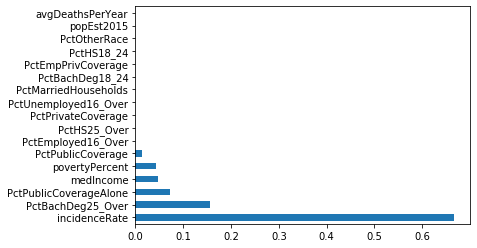

In [198]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=1)
adab = AdaBoostRegressor(n_estimators=100, base_estimator=dt, learning_rate=0.1)
adabRegModel = adab.fit(X_train, y_train)
adabPrediction = adabRegModel.predict(X_test)
print('R2 value', r2_score(y_train, adabRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-adabPrediction)/y_test))*100))

feature_importances = pd.Series(adabRegModel.feature_importances_, index=Predictors)
feature_importances.nlargest(17).plot.barh()

TestingData = pd.DataFrame(X_test, columns=Predictors)
TestingData['Target'] = y_test
TestingData['PredictedValue'] = adabPrediction
#TestingData['APE'] = (np.abs(y_test-rfPrediction)/y_test)*100
TestingData.head()

R2 value 0.9999999981240745
mean_squared_error 563.3571539872457
Accuracy 84.31349224876635


,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,povertyPercent,medIncome,PctEmployed16_Over,PctHS25_Over,PctPublicCoverage,PctPrivateCoverage,PctUnemployed16_Over,PctMarriedHouseholds,PctBachDeg18_24,PctEmpPrivCoverage,PctHS18_24,PctOtherRace,popEst2015,avgDeathsPerYear,PctBlack,Target,PredictedValue
0,15.9,471.4,15.6,14.7,56573.0,54.10,35.8,32.9,71.8,8.5,58.143608,5.7,45.8,36.9,1.076931,39165.0,85.0,27.649817,174.7,188.190186
1,17.5,411.3,13.1,10.8,55354.0,64.50,28.5,30.5,71.4,3.8,54.584673,5.3,44.4,29.1,1.286873,29228.0,61.0,0.814214,152.0,162.793503
2,22.9,410.9,12.5,9.2,64533.0,56.90,25.5,28.0,70.6,4.9,61.434325,8.5,43.7,41.3,3.178079,129048.0,221.0,1.968537,158.3,143.564148
3,17.4,492.9,10.8,6.7,61215.0,54.45,35.3,30.3,82.9,3.9,58.691877,14.7,54.9,24.5,0.104780,12435.0,29.0,0.411058,151.8,167.909668
4,20.4,497.7,15.7,11.2,55482.0,63.10,31.6,33.1,72.2,5.9,51.223106,11.6,50.2,36.1,0.173776,201169.0,451.0,0.684088,173.7,163.504211


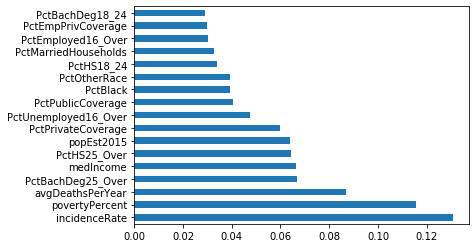

In [199]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, max_depth=7, learning_rate=0.2, booster='gbtree')
xgbRegModel = xgb.fit(X_train, y_train)
xgbPrediction = xgbRegModel.predict(X_test)
print('R2 value', r2_score(y_train, xgbRegModel.predict(X_train)))
print('mean_squared_error', mean_squared_error(y_train, rfRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-xgbPrediction)/y_test))*100))

feature_importances = pd.Series(xgbRegModel.feature_importances_, index=Predictors)
feature_importances.nlargest(17).plot.barh()

TestingData = pd.DataFrame(X_test, columns=Predictors)
TestingData['Target'] = y_test
TestingData['PredictedValue'] = xgbPrediction
#TestingData['APE'] = (np.abs(y_test-rfPrediction)/y_test)*100
TestingData.head()

In [200]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')
test_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,"(34218.1, 37413.8]",28.8,27.4,...,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,"(34218.1, 37413.8]",41.5,40.9,...,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,"(61494.5, 125635]",35.0,34.2,...,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,"(45201, 48021.6]",44.7,44.2,...,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,"(51046.4, 54545.6]",535.2,44.7,...,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


In [201]:
test_data[Predictors].isna().sum()

PctBachDeg25_Over          0
incidenceRate              0
PctPublicCoverageAlone     0
povertyPercent             0
medIncome                  0
PctEmployed16_Over        33
PctHS25_Over               0
PctPublicCoverage          0
PctPrivateCoverage         0
PctUnemployed16_Over       0
PctMarriedHouseholds       0
PctBachDeg18_24            0
PctEmpPrivCoverage         0
PctHS18_24                 0
PctOtherRace               0
popEst2015                 0
avgDeathsPerYear           0
PctBlack                   0
dtype: int64

In [202]:
test_data['PctEmployed16_Over'] = test_data['PctEmployed16_Over'].fillna(test_data['PctEmployed16_Over'].mean())

In [203]:
X_test_data = test_data[Predictors].values


In [204]:
pred = xgbRegModel.predict(X_test_data )
pred

array([131.8033  , 192.66963 , 162.11092 , 151.60748 , 190.68098 ,
       176.93167 , 190.03711 , 163.08168 , 148.5811  , 163.27614 ,
       154.78992 , 191.26863 , 166.06839 , 166.41322 , 212.47272 ,
       161.1381  , 200.09384 , 163.42902 , 189.58707 , 177.29904 ,
       176.06041 , 228.87296 , 179.61826 , 169.49173 , 130.08434 ,
       164.03917 , 163.62128 , 251.0711  , 162.98528 , 186.52519 ,
       151.37048 , 169.36562 , 158.84578 , 156.56755 , 142.79118 ,
       164.43996 , 146.9837  , 195.77728 , 157.34998 , 185.30536 ,
       202.89854 , 183.09174 , 169.54414 , 187.55583 , 156.78835 ,
       161.4396  , 158.40054 , 181.646   , 184.51497 , 173.44308 ,
       148.68942 , 162.19994 , 187.04988 , 169.32994 , 163.08879 ,
       191.70851 , 177.5435  , 193.3297  , 167.1457  , 174.89673 ,
       167.91525 , 190.23872 , 179.83269 , 170.063   , 180.34993 ,
       173.18404 , 179.86212 , 169.72386 , 190.29543 , 151.0027  ,
       207.58148 , 184.69125 , 180.66803 , 152.37675 , 187.584

In [205]:
predictions = np.round(pred,4)
predictions

array([131.8033, 192.6696, 162.1109, 151.6075, 190.681 , 176.9317,
       190.0371, 163.0817, 148.5811, 163.2761, 154.7899, 191.2686,
       166.0684, 166.4132, 212.4727, 161.1381, 200.0938, 163.429 ,
       189.5871, 177.299 , 176.0604, 228.873 , 179.6182, 169.4917,
       130.0843, 164.0392, 163.6213, 251.0711, 162.9853, 186.5252,
       151.3705, 169.3656, 158.8458, 156.5676, 142.7912, 164.44  ,
       146.9837, 195.7773, 157.35  , 185.3054, 202.8986, 183.0917,
       169.5441, 187.5558, 156.7884, 161.4396, 158.4005, 181.646 ,
       184.515 , 173.4431, 148.6894, 162.1999, 187.0499, 169.3299,
       163.0888, 191.7085, 177.5435, 193.3297, 167.1457, 174.8967,
       167.9152, 190.2387, 179.8327, 170.063 , 180.3499, 173.184 ,
       179.8621, 169.7239, 190.2954, 151.0027, 207.5815, 184.6912,
       180.668 , 152.3768, 187.5846, 147.5576, 171.4048, 163.5226,
       160.0104, 176.1338, 196.9923, 149.8196, 214.1782, 178.6294,
       179.9666, 166.4775, 154.8524, 210.1234, 195.8151, 193.9

In [206]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("datathon_2.csv", index = False) 